# PROJECT: REVIEWING BOSTON'S AIRBNB  DATA 

Name: Ayo Mosaku

### Table of Contents
* Introduction
* Data Accessment
* Data Wrangling
* Exploratory Data Analysis
* Data Preprocessing
* Model Building
* Project Objective

# SECTION I: INTRODUCTION

#### Dataset: Boston Airbnb Data as referrenced here: https://www.kaggle.com/datasets/airbnb/boston. 

Description: The AirBnb Activity Dataset to be used here is comprised of two related datasets really;


### 1. 'Reviews' Dataset: This includes unique id for each reviewer and detailed comments.
Column Description:

* __listing_id__: For every listing, this explicitly shows the ID generated for it, it is its primary key.
* __id__: This column provides a unique identifier for each review
* __date__: Shows date of review
* __reviewer_id__: Gives the unique ID for each reviewer.
* __reviewer_name__: Name for who put the review in 
* __comments__: words describing each reviewed property

### 2. 'Listings' Dataset: This includes the full descriptions and average review score amongst many other things

Column Description:

DUE TO COMPLEXITY, NOT ALL OF THIS DATASET'S COLUMNS CAN and WOULD BE EXPLAINED REALLY

* __listing_id__: For every listing, this explicitly shows the ID generated for it, it is its primary key.
* __listing_url__: link for accessing the property online
* __description__: describing the listing in question
* __neighbourhood__: location of airbnb listing
* __property_type__: explains a bit more what sort of property the listing is
* __host_verification__: pass check as done in accordance to AirBnB's policies
* __price__: base price for airbnb listing.
* __cancellation_policy__: explains how to cancel the listing's booking

### Research Questions:

1. What is the general outlook of the reviews comments ?
2. As a prospective Airbnb host, what sort of apartment do I need to have to increase my chances of making profit off rentals
3. What factors affect price the most really ?

#### Research Areas:

1. __Target Variable(Price)__: We aim to explore how the price of Airbnb listings fare in respect to other factors

2. __Univariate Analysis__: Asides price, we would aim to explore the columns in context in-depth

3. __Bivariate Analysis__: Here, although other factors are considered, we have a bias towards determine the factors that alter our 'price' the most

4. __Multivariate Analysis__: Here, we would take a deeper dive into how more than 2 columns affect one another. Remember, there is still a bias towards exploring our target variable

### Limitations

1. Multiple occurence of listing_id's make the merge process a bit messy
2. There is quite a number of columns with very little to no context
3. The data is very inconsistent and has some of its values invalid

In [575]:
#importing all required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

import warnings
warnings.filterwarnings('ignore')

In [576]:
#importing models, modules and frameworks needed

import sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [577]:
reviews = pd.read_csv('reviews.csv')

In [578]:
listings = pd.read_csv('listings.csv')

# SECTION II: DATA ACCESSING

Here, we initially try read our data, alongside reviewing its different qualities to gain context

In [580]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [581]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [582]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [583]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### 1. Missing Values

In [585]:
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

In [586]:
listings.isna().sum().sort_values(ascending=False)

has_availability                3585
license                         3585
neighbourhood_group_cleansed    3585
jurisdiction_names              3585
square_feet                     3529
                                ... 
is_location_exact                  0
room_type                          0
accommodates                       0
bed_type                           0
country                            0
Length: 95, dtype: int64

### 2. Duplicates

In [588]:
reviews.duplicated().sum()

0

In [589]:
listings.duplicated().sum()

0

### 3. Further Checks.

__#NOTE:__
We are careful not to clean this data, nor validate some of its values too early as it might affect our Models to be built

# SECTION III: DATA WRANGLING

#### To really wrangle, our main objective is to 'filter' these datasets, merge them and perform some intuitive feature engineering

Honestly, our unison goal here is on two exact basis:

1. We use Sentiment Analysis using VADER to categorise the 'comments' column in the reviews dataframe
2. We merge all columns innerly; that is, only account for what they all share

All of these are out steps to take BEFORE cleaning begins

Sentiment Analysis on our Reviews using VADER

In [595]:
analyze = SentimentIntensityAnalyzer()

In [596]:
statement1 = 'Ayo is a good boy'      #Testing Vader's polarities
statement2 = 'Ayo is a bad boy'
statement3 = 'Ayo is a very good boy'

In [597]:
print(analyze.polarity_scores(statement1))
print(analyze.polarity_scores(statement2))
print(analyze.polarity_scores(statement3))

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}


In [598]:
#From above we can confirm our VADER is decent enough for our comments prediction

In [599]:
reviews['comments'] = reviews['comments'].fillna('')

In [600]:
reviews.isna().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [601]:
def sentiment_analyzer(comment):
    '''Defining a function to help check the polarity scores of review comments'''
    score = analyze.polarity_scores(comment)
    if score['compound'] >= 0.1:
        return 'Positive'
    elif score['compound'] < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [602]:
reviews['review_grade'] = reviews['comments'].apply(sentiment_analyzer)

In [603]:
reviews['review_grade'].value_counts()

review_grade
Positive    62995
Neutral      3304
Negative     1976
Name: count, dtype: int64

In [604]:
reviews = reviews.rename(columns={'id':'review_id'})

In [605]:
reviews.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'review_grade'],
      dtype='object')

In [606]:
reviews['review_grade'].value_counts().index    #setting the order for the reviews

Index(['Positive', 'Neutral', 'Negative'], dtype='object', name='review_grade')

In [607]:
reviews_order = reviews['review_grade'].value_counts().index

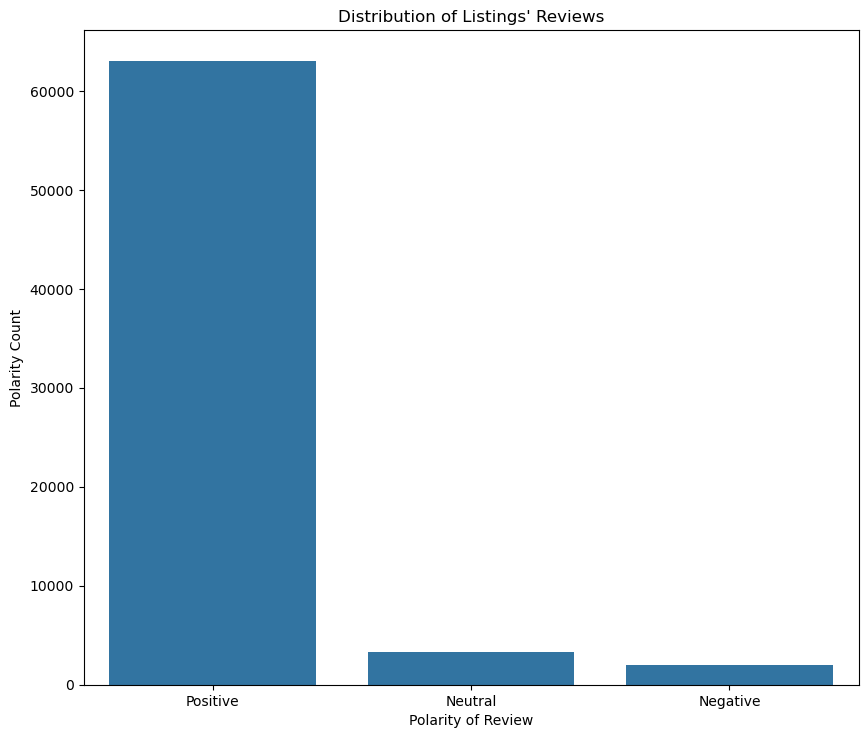

In [608]:
plt.figure(figsize=(10,8.5))
sns.countplot(data=reviews, x='review_grade', order=reviews_order)
plt.title('Distribution of Listings\' Reviews')
plt.xlabel('Polarity of Review')
plt.ylabel('Polarity Count');

In [609]:
reviews.head(2)

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,review_grade
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Positive
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Positive


In [610]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


Now we combine newreviews, listings and calendar on their common listing ID 

In [612]:
df = reviews.merge(listings, left_on='listing_id', right_on='id', how='inner').drop(columns=['id', 'comments'])

#Dropping easily recognizable columns of shared id in listings

In [613]:
df.head(3)

#exploring nour newly created dataframe

,listing_id,review_id,date,reviewer_id,reviewer_name,review_grade,listing_url,scrape_id,last_scraped,name,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1178162,4724140,2013-05-21,4298113,Olivier,Positive,https://www.airbnb.com/rooms/1178162,20160906204935,2016-09-07,Private Room Great Location Boston,...,9.0,f,NaN,NaN,f,strict,f,f,4,5.35
1,1178162,4869189,2013-05-29,6452964,Charlotte,Positive,https://www.airbnb.com/rooms/1178162,20160906204935,2016-09-07,Private Room Great Location Boston,...,9.0,f,NaN,NaN,f,strict,f,f,4,5.35
2,1178162,5003196,2013-06-06,6449554,Sebastian,Positive,https://www.airbnb.com/rooms/1178162,20160906204935,2016-09-07,Private Room Great Location Boston,...,9.0,f,NaN,NaN,f,strict,f,f,4,5.35


In [614]:
df.info()

#further checks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 100 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        68275 non-null  int64  
 1   review_id                         68275 non-null  int64  
 2   date                              68275 non-null  object 
 3   reviewer_id                       68275 non-null  int64  
 4   reviewer_name                     68275 non-null  object 
 5   review_grade                      68275 non-null  object 
 6   listing_url                       68275 non-null  object 
 7   scrape_id                         68275 non-null  int64  
 8   last_scraped                      68275 non-null  object 
 9   name                              68275 non-null  object 
 10  summary                           62064 non-null  object 
 11  space                             60344 non-null  object 
 12  des

In [615]:
#accessing our columns help spot more column to drop, here, the basis is on the columns being homogenous

todrop = []
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() == 1:
        todrop.append(col)

In [616]:
#dropiing homogenous numerical columns

todropnum = []
for col in df.select_dtypes(include='number').columns:
    if df[col].nunique() == 1:
        todropnum.append(col)

In [617]:
todrop

['last_scraped',
 'experiences_offered',
 'state',
 'country_code',
 'country',
 'calendar_last_scraped',
 'requires_license']

In [618]:
todropnum

['scrape_id']

In [619]:
noneed = df.loc[:, df.isna().mean() == 1].columns

In [620]:
noneed

Index(['neighbourhood_group_cleansed', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [621]:
df.isna().sum().sort_values(ascending=False).head(10)

has_availability                68275
neighbourhood_group_cleansed    68275
license                         68275
jurisdiction_names              68275
square_feet                     66492
monthly_price                   42952
weekly_price                    41275
security_deposit                37328
notes                           23457
cleaning_fee                    21955
dtype: int64

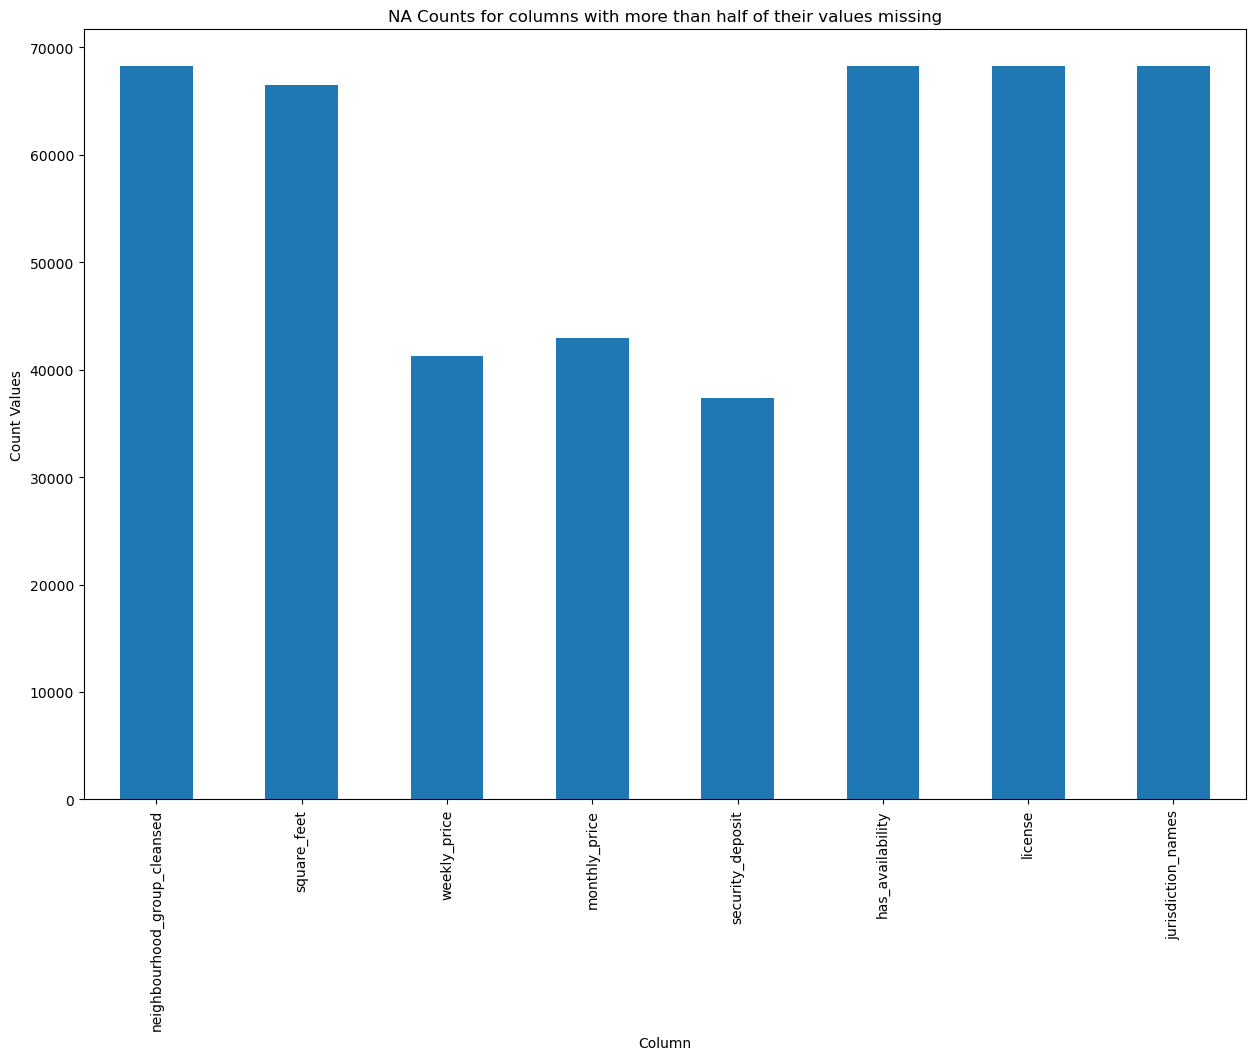

In [622]:
# plotting to see the distribution in non-homogenous columns that have the majority nans

plt.figure(figsize=(15, 10))
df.loc[:, df.isna().mean() > 0.5].isna().sum().plot(kind='bar', rot=90, xlabel='Column', ylabel='Count Values', title='NA Counts for columns with more than half of their values missing');

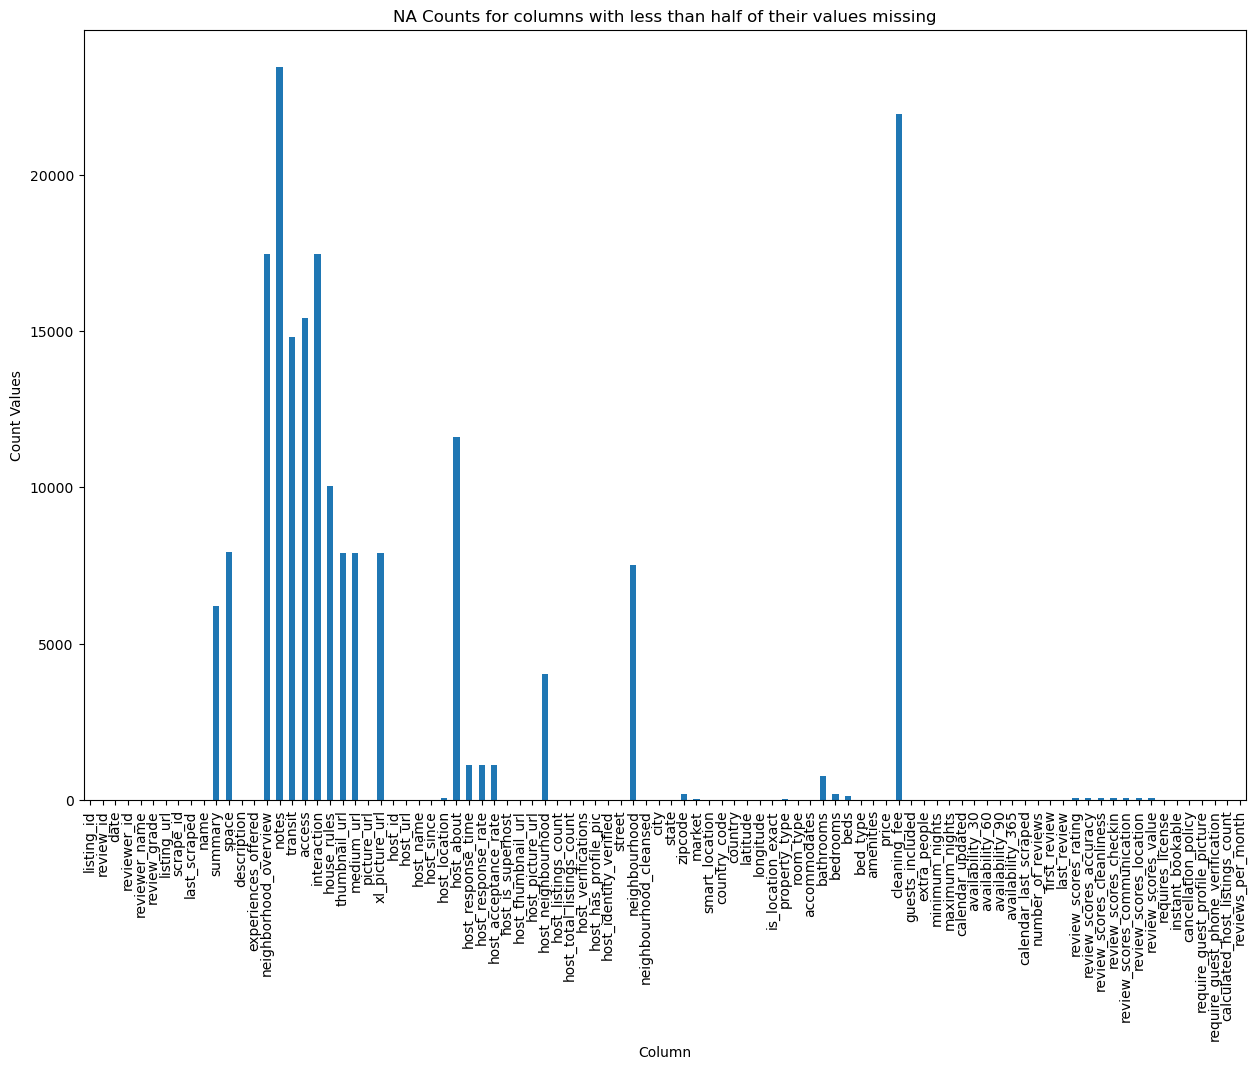

In [623]:
#displaying na values in other columns(with less than half of their rows being nans)

plt.figure(figsize=(15, 10))
df.loc[:, df.isna().mean() < 0.5].isna().sum().plot(kind='bar', rot=90, xlabel='Column', ylabel='Count Values', title='NA Counts for columns with less than half of their values missing');

### dropping these columns:

In [625]:
df.drop(labels=todrop, axis=1, inplace=True) #about 7 columns would be dropped frpom our original 100

In [626]:
df.drop(labels=noneed, axis=1, inplace=True) #an additional 4 columns to be dropped

In [627]:
df.drop(labels=todropnum, axis=1, inplace=True) #an additional column to be dropped

In [628]:
df.shape #reaccessing our dataframe shape

(68275, 88)

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        68275 non-null  int64  
 1   review_id                         68275 non-null  int64  
 2   date                              68275 non-null  object 
 3   reviewer_id                       68275 non-null  int64  
 4   reviewer_name                     68275 non-null  object 
 5   review_grade                      68275 non-null  object 
 6   listing_url                       68275 non-null  object 
 7   name                              68275 non-null  object 
 8   summary                           62064 non-null  object 
 9   space                             60344 non-null  object 
 10  description                       68275 non-null  object 
 11  neighborhood_overview             50809 non-null  object 
 12  note

In [630]:
df['price']     #gradually exploring our target variable

0        $95.00
1        $95.00
2        $95.00
3        $95.00
4        $95.00
          ...  
68270    $75.00
68271    $75.00
68272    $75.00
68273    $75.00
68274    $75.00
Name: price, Length: 68275, dtype: object

In [631]:
df['price'].value_counts()   

price
$75.00       3378
$99.00       3161
$125.00      2897
$65.00       2477
$150.00      2396
             ... 
$750.00         1
$134.00         1
$1,000.00       1
$27.00          1
$1,250.00       1
Name: count, Length: 294, dtype: int64

In [632]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 68275 entries, 0 to 68274
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
68275 non-null  object
dtypes: object(1)
memory usage: 533.5+ KB


In [633]:
df.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'reviewer_name',
       'review_grade', 'listing_url', 'name', 'summary', 'space',
       'description', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
       'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'squ

#### For easier undertstanding and analysis for a thorough visual inspection;

In [635]:
df.columns.sort_values(ascending=True)

Index(['access', 'accommodates', 'amenities', 'availability_30',
       'availability_365', 'availability_60', 'availability_90', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee',
       'date', 'description', 'extra_people', 'first_review',
       'guests_included', 'host_about', 'host_acceptance_rate',
       'host_has_profile_pic', 'host_id', 'host_identity_verified',
       'host_is_superhost', 'host_listings_count', 'host_location',
       'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_total_listings_count', 'host_url',
       'host_verifications', 'house_rules', 'instant_bookable', 'interaction',
       'is_location_exact', 'last_review', 'latitude', 'listing_id',
       'listing_url', 'longitude', 'market', 'maximum_nights', 'medium_url',
       'minimum_nights', '

In [636]:
sorted_df = df.sort_index(axis=1)

In [637]:
sorted_df

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,smart_location,space,square_feet,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7,342,37,67,1.0,Futon,1.0,...,"Boston, MA",Great Boston Location conveniently located nea...,NaN,"Saratoga Street, Boston, MA 02128, United States",NaN,https://a2.muscache.com/im/pictures/19b75f9c-e...,NaN,$550.00,https://a2.muscache.com/im/pictures/19b75f9c-e...,02128
1,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7,342,37,67,1.0,Futon,1.0,...,"Boston, MA",Great Boston Location conveniently located nea...,NaN,"Saratoga Street, Boston, MA 02128, United States",NaN,https://a2.muscache.com/im/pictures/19b75f9c-e...,NaN,$550.00,https://a2.muscache.com/im/pictures/19b75f9c-e...,02128
2,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7,342,37,67,1.0,Futon,1.0,...,"Boston, MA",Great Boston Location conveniently located nea...,NaN,"Saratoga Street, Boston, MA 02128, United States",NaN,https://a2.muscache.com/im/pictures/19b75f9c-e...,NaN,$550.00,https://a2.muscache.com/im/pictures/19b75f9c-e...,02128
3,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7,342,37,67,1.0,Futon,1.0,...,"Boston, MA",Great Boston Location conveniently located nea...,NaN,"Saratoga Street, Boston, MA 02128, United States",NaN,https://a2.muscache.com/im/pictures/19b75f9c-e...,NaN,$550.00,https://a2.muscache.com/im/pictures/19b75f9c-e...,02128
4,NaN,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7,342,37,67,1.0,Futon,1.0,...,"Boston, MA",Great Boston Location conveniently located nea...,NaN,"Saratoga Street, Boston, MA 02128, United States",NaN,https://a2.muscache.com/im/pictures/19b75f9c-e...,NaN,$550.00,https://a2.muscache.com/im/pictures/19b75f9c-e...,02128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68270,1. House is cleaned by staff everyday. 2. Priv...,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,290,11,15,2.0,Real Bed,1.0,...,"Boston, MA",My location is close to a lot of attraction li...,NaN,"Hooker St, Boston, MA 02134, United States","My place is close to Harvard Business School, ...",https://a0.muscache.com/im/pictures/94705214/d...,NaN,$395.00,https://a0.muscache.com/im/pictures/94705214/d...,02134
68271,1. House is cleaned by staff everyday. 2. Priv...,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,290,11,15,2.0,Real Bed,1.0,...,"Boston, MA",My location is close to a lot of attraction li...,NaN,"Hooker St, Boston, MA 02134, United States","My place is close to Harvard Business School, ...",https://a0.muscache.com/im/pictures/94705214/d...,NaN,$395.00,https://a0.muscache.com/im/pictures/94705214/d...,02134
68272,1. House is cleaned by staff everyday. 2. Priv...,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,290,11,15,2.0,Real Bed,1.0,...,"Boston, MA",My location is close to a lot of attraction li...,NaN,"Hooker St, Boston, MA 02134, United States","My place is close to Harvard Business School, ...",https://a0.muscache.com/im/pictures/94705214/d...,NaN,$395.00,https://a0.muscache.com/im/pictures/94705214/d...,02134
68273,1. House is cleaned by staff everyday. 2. Priv...,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0,290,11,15,2.0,Real Bed,1.0,...,"Boston, MA",My location is close to a lot of attraction li...,NaN,"Hooker St, Boston, MA 02134, United States","My place is close to Harvard Business School, ...",https://a0.muscache.com/im/pictures/94705214/d...,NaN,$395.00,https://a0.muscache.com/im/pictures/94705214/d...,02134


In [638]:
df.columns.sort_values()

Index(['access', 'accommodates', 'amenities', 'availability_30',
       'availability_365', 'availability_60', 'availability_90', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee',
       'date', 'description', 'extra_people', 'first_review',
       'guests_included', 'host_about', 'host_acceptance_rate',
       'host_has_profile_pic', 'host_id', 'host_identity_verified',
       'host_is_superhost', 'host_listings_count', 'host_location',
       'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_total_listings_count', 'host_url',
       'host_verifications', 'house_rules', 'instant_bookable', 'interaction',
       'is_location_exact', 'last_review', 'latitude', 'listing_id',
       'listing_url', 'longitude', 'market', 'maximum_nights', 'medium_url',
       'minimum_nights', '

In [639]:
furtherinv = []
for col in df.columns: #checking cardinality of columns
    if df[col].value_counts().count() > 5:
        furtherinv.append(col)

In [640]:
furtherinv     #displaying highly cardinal columns

['listing_id',
 'review_id',
 'date',
 'reviewer_id',
 'reviewer_name',
 'listing_url',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'zipcode',
 'smart_location',
 'latitude',
 'longitude',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'av

In [641]:
df['reviews_per_month'].value_counts()

reviews_per_month
3.86    501
3.75    494
6.23    451
5.85    447
7.05    443
       ... 
4.77      7
2.43      6
5.29      6
0.02      2
0.01      1
Name: count, Length: 644, dtype: int64

In [642]:
def find_dollar_sign(df):
    '''To expose columns with $ in their values'''
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Check if any value in the column contains a dollar sign using regex
        if df[col].astype(str).str.contains(r'\$', regex=True).any():
            print(f"Dollar sign found in column: {col}")

In [643]:
find_dollar_sign(df)

Dollar sign found in column: name
Dollar sign found in column: summary
Dollar sign found in column: space
Dollar sign found in column: description
Dollar sign found in column: neighborhood_overview
Dollar sign found in column: notes
Dollar sign found in column: transit
Dollar sign found in column: access
Dollar sign found in column: interaction
Dollar sign found in column: house_rules
Dollar sign found in column: host_about
Dollar sign found in column: price
Dollar sign found in column: weekly_price
Dollar sign found in column: monthly_price
Dollar sign found in column: security_deposit
Dollar sign found in column: cleaning_fee
Dollar sign found in column: extra_people


In [644]:
df['security_deposit'].value_counts()

security_deposit
$100.00      11321
$500.00       3935
$200.00       3288
$300.00       2837
$250.00       2524
$150.00       2460
$400.00       1141
$95.00         539
$350.00        532
$1,000.00      368
$125.00        268
$600.00        249
$99.00         172
$450.00        161
$1,500.00      117
$399.00         85
$325.00         83
$301.00         73
$180.00         65
$275.00         64
$750.00         63
$800.00         63
$425.00         62
$199.00         56
$185.00         52
$179.00         48
$375.00         36
$2,500.00       30
$475.00         30
$299.00         29
$3,000.00       27
$446.00         26
$2,000.00       23
$4,000.00       22
$650.00         20
$1,250.00       12
$1,900.00        9
$220.00          7
$120.00          7
$4,500.00        7
$160.00          6
$298.00          6
$147.00          6
$700.00          6
$223.00          3
$330.00          3
$128.00          2
$950.00          2
$1,200.00        1
$175.00          1
Name: count, dtype: int64

In [645]:
def extract_dollar_values(df):
    '''Function to extract dollar values in columns'''
    def extract_and_convert(value):
        if pd.isna(value) or value == '':
            return pd.NA
        if isinstance(value, str):
            # Extract numbers, including negative signs and decimal points
            match = re.search(r'-?\$?(\d+(?:\.\d+)?)', value)
            if match:
                return float(match.group(1))
        return value

    for column in df.columns:
        if df[column].dtype == 'object' and df[column].str.contains(r'\$|\d', na=False).any():
            df[column] = df[column].apply(extract_and_convert)
    
    return df

In [646]:
extract_dollar_values(df)  #running our extacrting function

,listing_id,review_id,date,reviewer_id,reviewer_name,review_grade,listing_url,name,summary,space,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1178162,4724140,2013.0,4298113,Olivier,Positive,1178162.0,Private Room Great Location Boston,<NA>,6.0,...,9.0,9.0,8.0,9.0,f,strict,f,f,4,5.35
1,1178162,4869189,2013.0,6452964,Charlotte,Positive,1178162.0,Private Room Great Location Boston,<NA>,6.0,...,9.0,9.0,8.0,9.0,f,strict,f,f,4,5.35
2,1178162,5003196,2013.0,6449554,Sebastian,Positive,1178162.0,Private Room Great Location Boston,<NA>,6.0,...,9.0,9.0,8.0,9.0,f,strict,f,f,4,5.35
3,1178162,5150351,2013.0,2215611,Marine,Positive,1178162.0,Private Room Great Location Boston,<NA>,6.0,...,9.0,9.0,8.0,9.0,f,strict,f,f,4,5.35
4,1178162,5171140,2013.0,6848427,Andrew,Positive,1178162.0,Private Room Great Location Boston,<NA>,6.0,...,9.0,9.0,8.0,9.0,f,strict,f,f,4,5.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016.0,22034145,Antonio,Positive,7462268.0,"Allston, close to Harvard Business School + BU D",5.0,40.0,...,10.0,10.0,9.0,10.0,t,flexible,f,f,8,2.32
68271,7462268,83640094,2016.0,40052513,Steve,Positive,7462268.0,"Allston, close to Harvard Business School + BU D",5.0,40.0,...,10.0,10.0,9.0,10.0,t,flexible,f,f,8,2.32
68272,7462268,85797088,2016.0,77129134,Nick,Positive,7462268.0,"Allston, close to Harvard Business School + BU D",5.0,40.0,...,10.0,10.0,9.0,10.0,t,flexible,f,f,8,2.32
68273,7462268,97264637,2016.0,15799803,Vid,Positive,7462268.0,"Allston, close to Harvard Business School + BU D",5.0,40.0,...,10.0,10.0,9.0,10.0,t,flexible,f,f,8,2.32


In [647]:
to_num = ['price','security_deposit','cleaning_fee','extra_people']

In [648]:
df[to_num]

,price,security_deposit,cleaning_fee,extra_people
0,95.0,100.0,NaN,0.0
1,95.0,100.0,NaN,0.0
2,95.0,100.0,NaN,0.0
3,95.0,100.0,NaN,0.0
4,95.0,100.0,NaN,0.0
...,...,...,...,...
68270,75.0,100.0,35.0,0.0
68271,75.0,100.0,35.0,0.0
68272,75.0,100.0,35.0,0.0
68273,75.0,100.0,35.0,0.0


In [649]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['security_deposit'] = pd.to_numeric(df['security_deposit'], errors='coerce')
df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'], errors='coerce')
df['extra_people'] = pd.to_numeric(df['extra_people'], errors='coerce')

#hard converting numeric columns

In [650]:
df.select_dtypes(include='number').columns.sort_values()

Index(['accommodates', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'calculated_host_listings_count', 'cleaning_fee', 'date',
       'extra_people', 'first_review', 'guests_included', 'host_id',
       'host_listings_count', 'host_picture_url', 'host_since',
       'host_thumbnail_url', 'host_total_listings_count', 'host_url',
       'last_review', 'latitude', 'listing_id', 'listing_url', 'longitude',
       'maximum_nights', 'minimum_nights', 'number_of_reviews', 'picture_url',
       'price', 'review_id', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviewer_id', 'reviews_per_month', 'security_deposit', 'square_feet'],
      dtype='object')

In [651]:
df['transit'].value_counts()    #upon inspection, we see some messy data in this coulmn

transit
5.0                                                                                                                                                                                                                                                                                                                                                  7592
10.0                                                                                                                                                                                                                                                                                                                                                 6524
2.0                                                                                                                                                                                                                                                                                                         

### Feature Selection

What we actually do here is to select columns to be used for our Machine Learning Model

In [653]:
hz = df[[
    'availability_30',
    'cancellation_policy', 'instant_bookable', 'minimum_nights', 'maximum_nights',
    'bathrooms', 'bed_type', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included',
    'property_type', 'room_type', 'square_feet', 'city', 'latitude', 'longitude',
    'neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'host_acceptance_rate',
    'host_is_superhost', 'host_listings_count',
    'host_response_time', 'host_total_listings_count', 'number_of_reviews', 'review_scores_accuracy', 'price', 'security_deposit',
    'extra_people'
]]

In [654]:
hz     

,availability_30,cancellation_policy,instant_bookable,minimum_nights,maximum_nights,bathrooms,bed_type,bedrooms,beds,cleaning_fee,...,host_acceptance_rate,host_is_superhost,host_listings_count,host_response_time,host_total_listings_count,number_of_reviews,review_scores_accuracy,price,security_deposit,extra_people
0,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,97.0,f,4,within an hour,4,215,9.0,95.0,100.0,0.0
1,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,97.0,f,4,within an hour,4,215,9.0,95.0,100.0,0.0
2,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,97.0,f,4,within an hour,4,215,9.0,95.0,100.0,0.0
3,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,97.0,f,4,within an hour,4,215,9.0,95.0,100.0,0.0
4,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,97.0,f,4,within an hour,4,215,9.0,95.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68270,0,flexible,t,1,1125,2.0,Real Bed,1.0,1.0,35.0,...,100.0,f,8,within an hour,8,32,10.0,75.0,100.0,0.0
68271,0,flexible,t,1,1125,2.0,Real Bed,1.0,1.0,35.0,...,100.0,f,8,within an hour,8,32,10.0,75.0,100.0,0.0
68272,0,flexible,t,1,1125,2.0,Real Bed,1.0,1.0,35.0,...,100.0,f,8,within an hour,8,32,10.0,75.0,100.0,0.0
68273,0,flexible,t,1,1125,2.0,Real Bed,1.0,1.0,35.0,...,100.0,f,8,within an hour,8,32,10.0,75.0,100.0,0.0


In [655]:
hz['host_duration'] = 2024-df['host_since']     #creating new column for age of host's hostings :)

In [656]:
hz['host_duration']= hz['host_duration'].astype('int8')    #type conversion

In [657]:
hz['host_duration']     #validatiing host duration age

0        13
1        13
2        13
3        13
4        13
         ..
68270    10
68271    10
68272    10
68273    10
68274    10
Name: host_duration, Length: 68275, dtype: int8

In [658]:
hz.columns      #verifyingdataframe

Index(['availability_30', 'cancellation_policy', 'instant_bookable',
       'minimum_nights', 'maximum_nights', 'bathrooms', 'bed_type', 'bedrooms',
       'beds', 'cleaning_fee', 'guests_included', 'property_type', 'room_type',
       'square_feet', 'city', 'latitude', 'longitude', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_response_time',
       'host_total_listings_count', 'number_of_reviews',
       'review_scores_accuracy', 'price', 'security_deposit', 'extra_people',
       'host_duration'],
      dtype='object')

In [659]:
hz.head()      #accessing ML dependent dataframe

,availability_30,cancellation_policy,instant_bookable,minimum_nights,maximum_nights,bathrooms,bed_type,bedrooms,beds,cleaning_fee,...,host_is_superhost,host_listings_count,host_response_time,host_total_listings_count,number_of_reviews,review_scores_accuracy,price,security_deposit,extra_people,host_duration
0,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,f,4,within an hour,4,215,9.0,95.0,100.0,0.0,13
1,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,f,4,within an hour,4,215,9.0,95.0,100.0,0.0,13
2,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,f,4,within an hour,4,215,9.0,95.0,100.0,0.0,13
3,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,f,4,within an hour,4,215,9.0,95.0,100.0,0.0,13
4,7,strict,f,1,1125,1.0,Futon,1.0,1.0,NaN,...,f,4,within an hour,4,215,9.0,95.0,100.0,0.0,13


In [660]:
hz.info()     #accessing ML dependent dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   availability_30            68275 non-null  int64  
 1   cancellation_policy        68275 non-null  object 
 2   instant_bookable           68275 non-null  object 
 3   minimum_nights             68275 non-null  int64  
 4   maximum_nights             68275 non-null  int64  
 5   bathrooms                  67510 non-null  float64
 6   bed_type                   68275 non-null  object 
 7   bedrooms                   68088 non-null  float64
 8   beds                       68162 non-null  float64
 9   cleaning_fee               46320 non-null  float64
 10  guests_included            68275 non-null  int64  
 11  property_type              68247 non-null  object 
 12  room_type                  68275 non-null  object 
 13  square_feet                1783 non-null   flo

# SECTION IV: EXPLORATORY DATA ANALYSIS


#### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. We are going to be exploring the data with these questions in mind

##### 
* What factors are important to know, the ones that really determine the price for AirBnb listings
* How do these factors vary 

## 1. Target Variable EDA

__price__, being our targevet, we aim to visualize it in details

In [666]:
bin = np.arange(0, hz['price'].max()+15, 15)

In [667]:
color=sns.color_palette()[0]

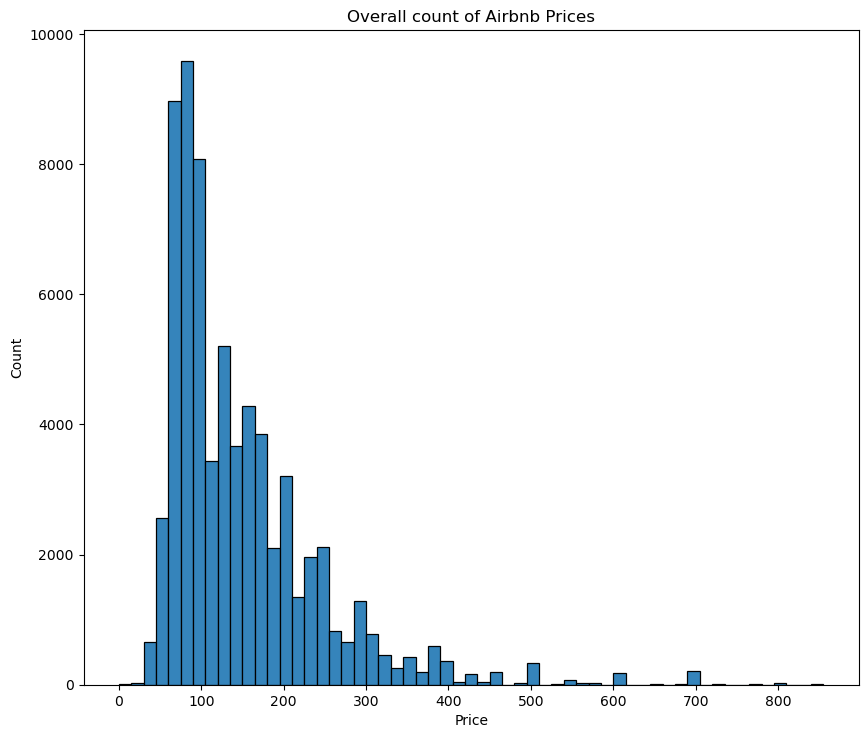

In [919]:
plt.figure(figsize=(10,8.5))
sns.histplot(data=hz, x='price', bins=bin, alpha=0.9, color=color)
plt.xticks(np.arange(0, 900, 100))
plt.title('Overall count of Airbnb Prices')
plt.xlabel('Price');     #using a histplot to view the distribution of prices

* The skew tells us so many info really, we see the peak right before the 100th mark. 
* Really that skew shows other different prices we get, but the count show how few they are

Text(0, 0.5, 'Density')

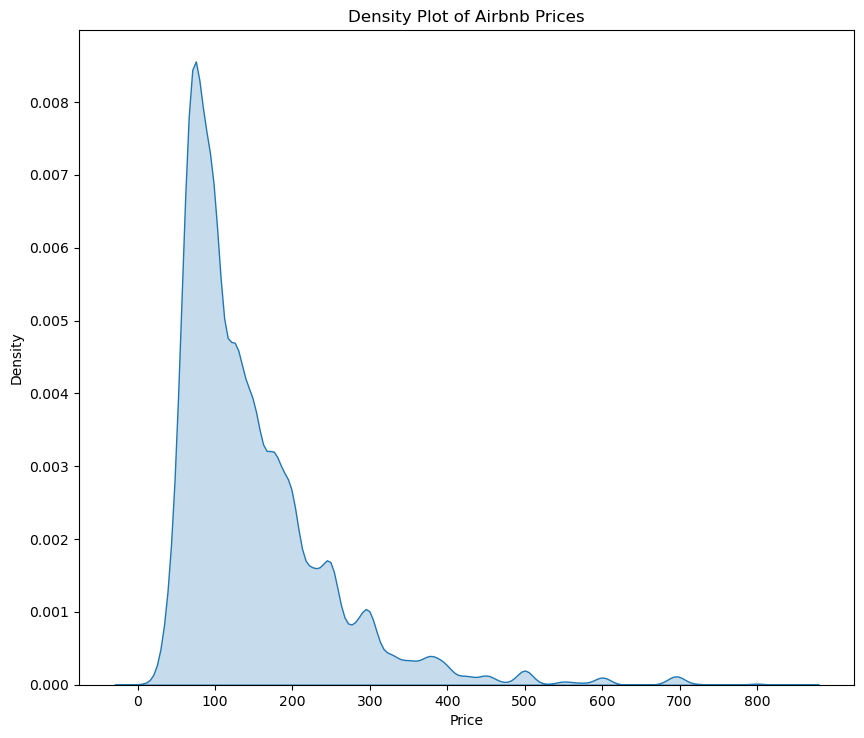

In [921]:
plt.figure(figsize=(10,8.5))
sns.kdeplot(hz['price'], shade=True)
plt.title('Density Plot of Airbnb Prices')
plt.xlabel('Price')
plt.xticks(np.arange(0,900,100))
plt.ylabel('Density')     #showing continous probability of the price data

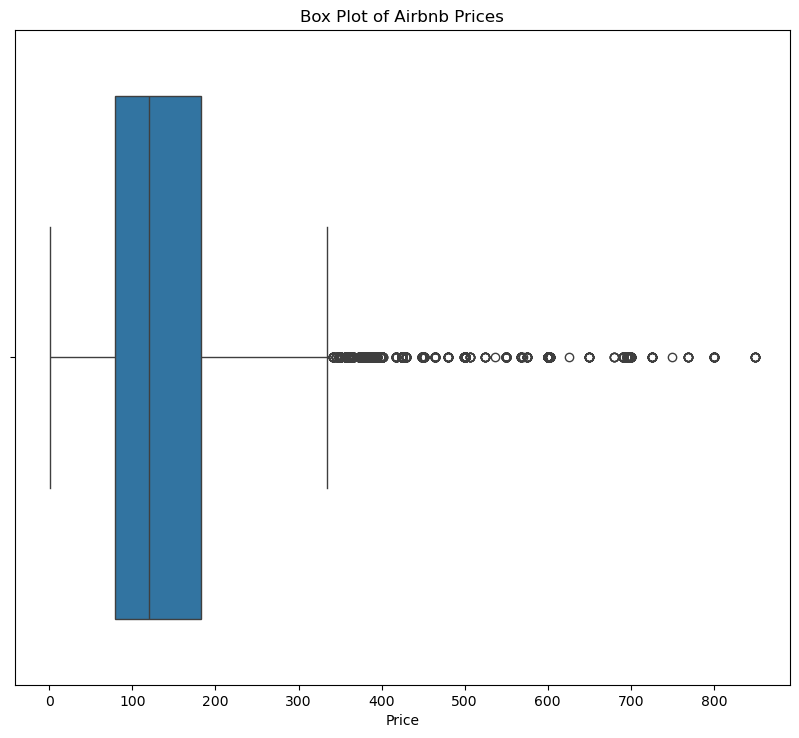

In [923]:
plt.figure(figsize=(10,8.5))
sns.boxplot(x=hz['price'])
plt.title('Box Plot of Airbnb Prices')
plt.xlabel('Price')
plt.xticks(np.arange(0,900,100))
plt.show()   #box plot for further inspection

Breaking the plots down;

* Mode: We have the mostr prices at around 70
* Median: Our box plot here shows our median to be about 110$ thereabout. This is greatly influenced by the outliers.
* Interquartile Rnage: a range of about 70 to nearly 200, shows where our majority of prices are
* Whiskers: The whiskers, especially the one to the right, shows at what value we start considering prices to be outliers
* Outliers: Outliers ranging from 330 thereabout to 800+, showing higher prices than majority


## 2. Univariate EDA

We will observe the trends by cheching the proportion in each variable

In [675]:
def plot_order(col):
    '''Function to give order to plots'''
    return hz[col].value_counts().index

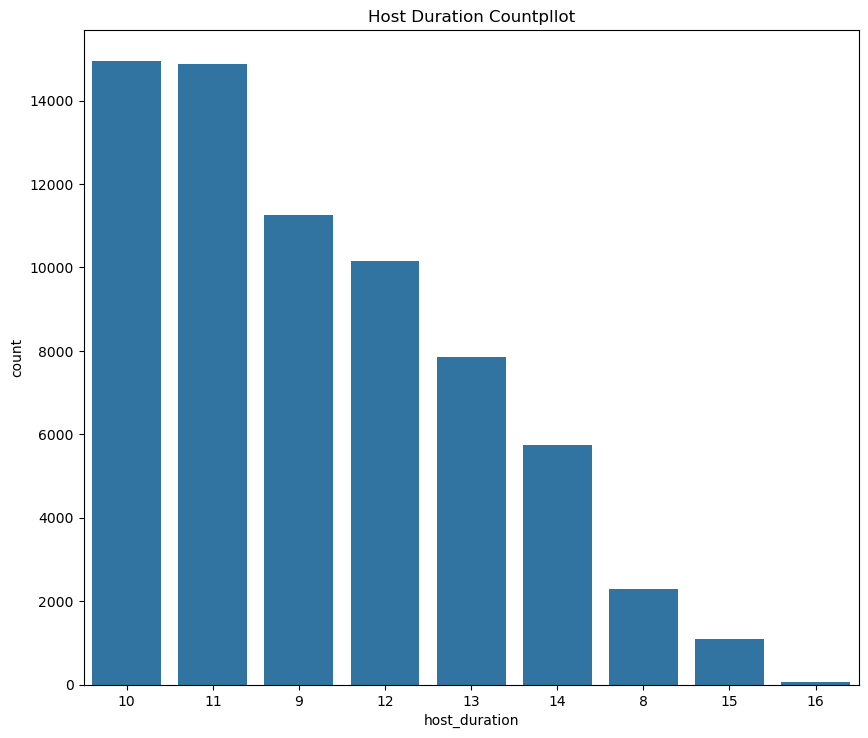

In [925]:
plt.figure(figsize=(10,8.5))
sns.countplot(data=hz, x='host_duration', order=plot_order('host_duration'))
plt.title('Host Duration Countpllot');        #counting values in 'host_duration'

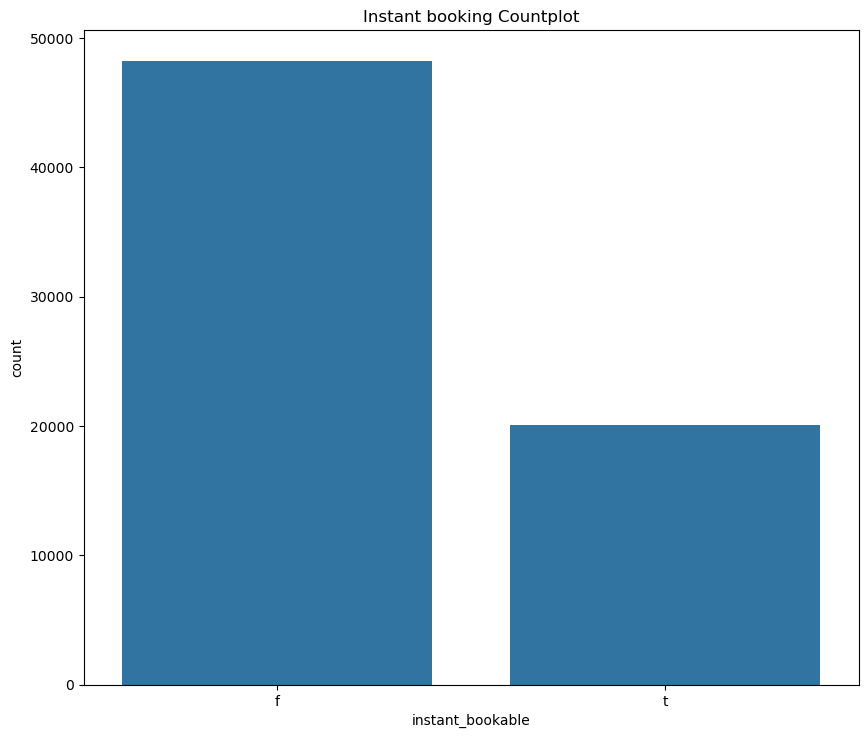

In [927]:
plt.figure(figsize=(10,8.5))
sns.countplot(data=hz, x='instant_bookable')
plt.title('Instant booking Countplot');      #counting values in 'instant_bookable'  

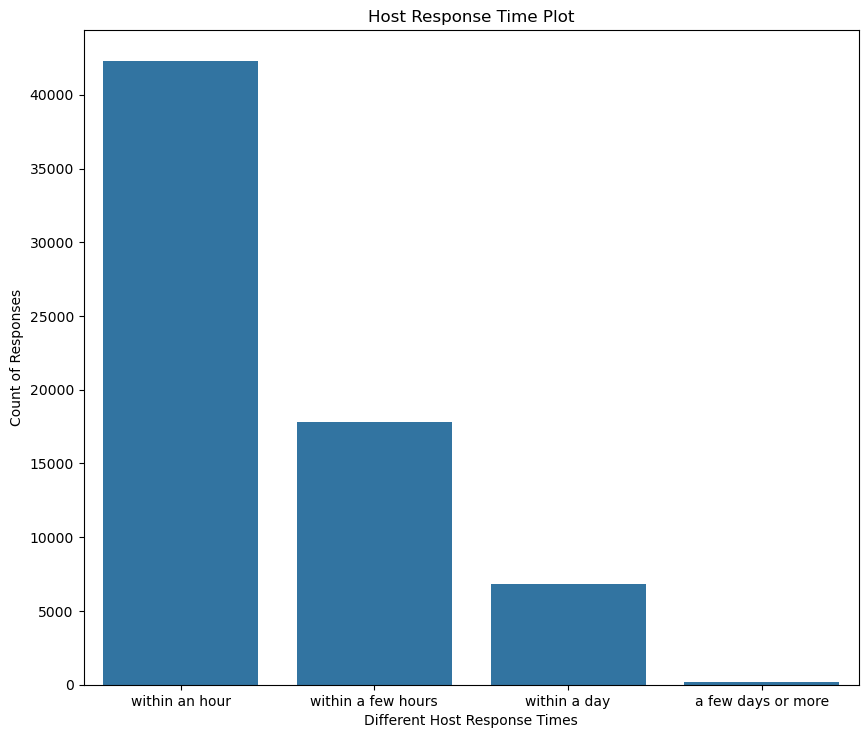

In [678]:
plt.figure(figsize=(10,8.5))
sns.countplot(data=hz, x='host_response_time', order=plot_order('host_response_time'))#counting 'response_time' according to listing
plt.xticks(rotation=0)
plt.xlabel('Different Host Response Times')
plt.ylabel('Count of Responses')
plt.title('Host Response Time Plot');

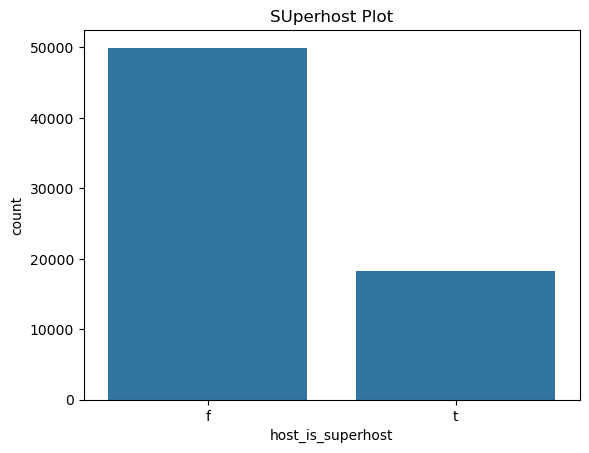

In [679]:
sns.countplot(data=hz, x='host_is_superhost')
plt.title('SUperhost Plot');        #superhost count

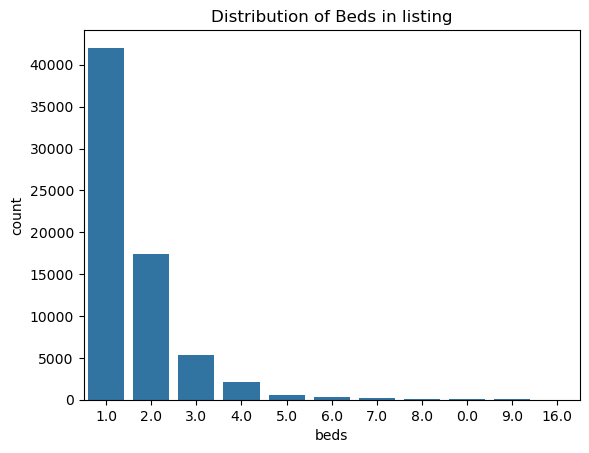

In [680]:
sns.countplot(data=hz, x='beds', order=plot_order('beds'))
plt.title('Distribution of Beds in listing');   #showing distribution of beds

In [681]:
hz['room_type'].value_counts()

room_type
Entire home/apt    36104
Private room       31306
Shared room          865
Name: count, dtype: int64

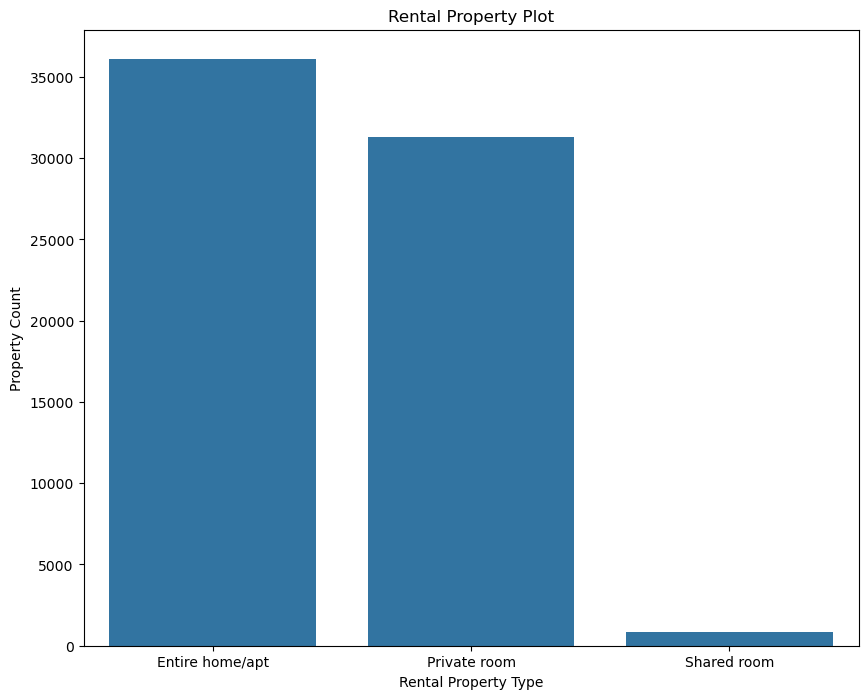

In [682]:
plt.figure(figsize=(10,8))
sns.countplot(data=hz, x='room_type', order=plot_order('room_type'))      #distribution of roomtypes
plt.yticks(np.arange(0, 36000, 5000))
plt.xlabel('Rental Property Type')
plt.ylabel('Property Count')
plt.title('Rental Property Plot');      

In [683]:
hz['bed_type'].value_counts()

bed_type
Real Bed         66023
Futon             1116
Pull-out Sofa      600
Airbed             474
Couch               62
Name: count, dtype: int64

In [684]:
color=sns.color_palette()[0]

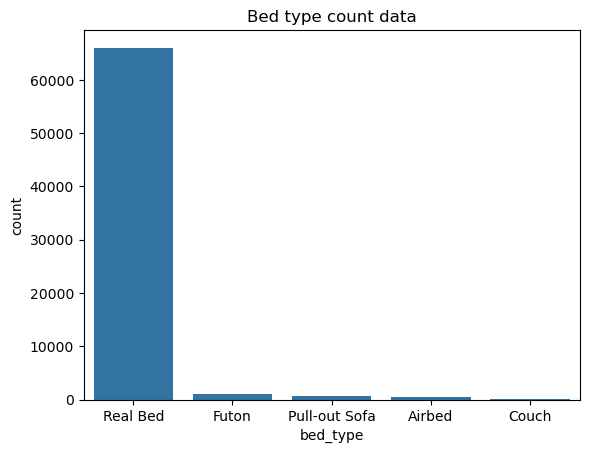

In [685]:
sns.countplot(data=hz, x='bed_type', color=color, order=plot_order('bed_type'))
plt.title('Bed type count data');         #different 'bed_type' variations

In [686]:
hz['property_type'].value_counts()

property_type
Apartment          44553
House              16997
Condominium         3339
Bed & Breakfast     1437
Townhouse            880
Loft                 730
Boat                 187
Other                 64
Villa                 33
Dorm                  25
Entire Floor           1
Guesthouse             1
Name: count, dtype: int64

In [687]:
hz['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Jamaica Plain              9055
Dorchester                 7396
South End                  5714
East Boston                5504
North End                  4483
Back Bay                   4389
Beacon Hill                4098
South Boston               3851
Roxbury                    3775
Brighton                   3052
Allston                    2988
Fenway                     2817
Downtown                   2535
Charlestown                1981
Mission Hill               1469
Roslindale                 1387
South Boston Waterfront     744
West Roxbury                690
Chinatown                   669
Mattapan                    442
Longwood Medical Area       393
Hyde Park                   376
Bay Village                 241
West End                    157
Leather District             69
Name: count, dtype: int64

In [688]:
hz['price'].value_counts()

price
75.0     3378
99.0     3161
125.0    2897
65.0     2477
150.0    2396
         ... 
750.0       1
625.0       1
20.0        1
536.0       1
570.0       1
Name: count, Length: 292, dtype: int64

In [689]:
hz['bedrooms'].value_counts()

bedrooms
1.0    48864
2.0     9800
0.0     5568
3.0     2668
4.0      978
5.0      210
Name: count, dtype: int64

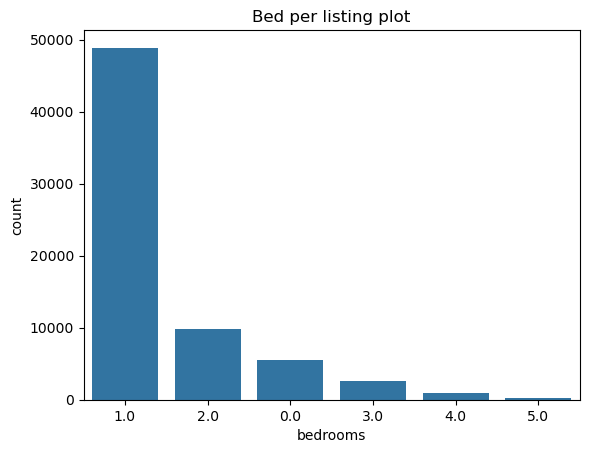

In [690]:
sns.countplot(data=hz, x='bedrooms', color=color, order=plot_order('bedrooms'))
plt.title('Bed per listing plot');

In [691]:
hz['city'].value_counts().head(10)

city
Boston              62350
Dorchester           1684
Brighton              773
Jamaica Plain         616
Charlestown           595
Allston               413
Roslindale            290
East Boston           263
Roxbury Crossing      230
South Boston          142
Name: count, dtype: int64

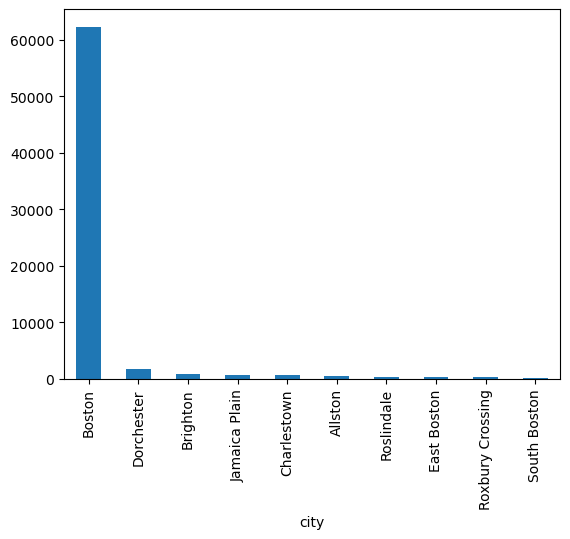

In [692]:
hz['city'].value_counts().head(10).plot(kind='bar');        #visualising distribution of cities and their listings

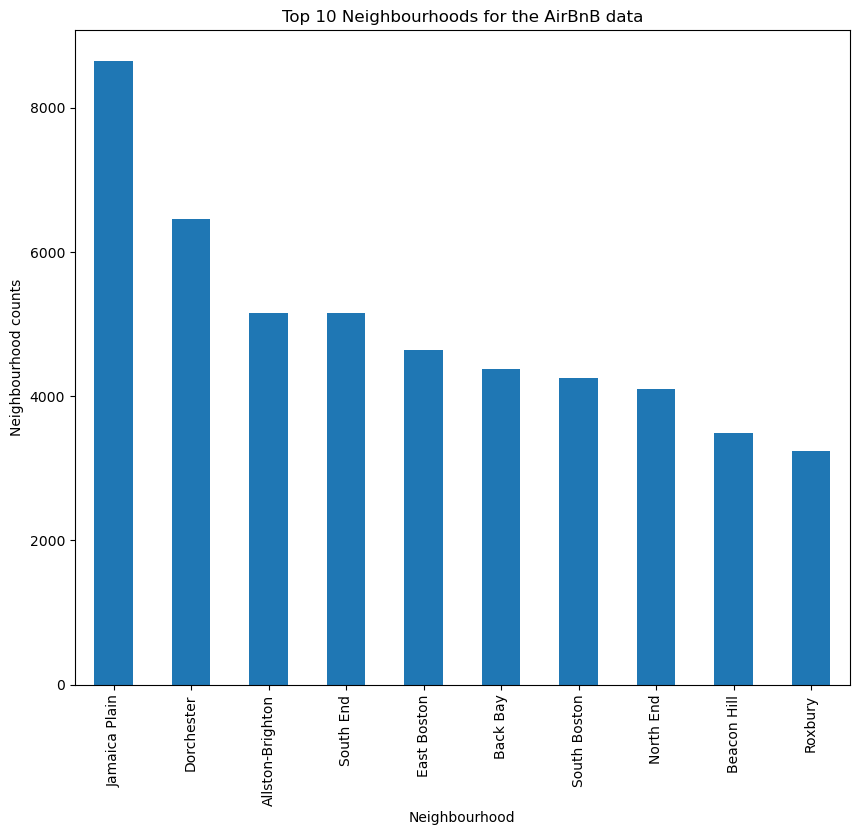

In [693]:
plt.figure(figsize=(10,8.5))
hz['neighbourhood'].value_counts().head(10).plot(kind='bar') 
plt.title('Top 10 Neighbourhoods for the AirBnB data')
plt.xlabel('Neighbourhood')
plt.ylabel('Neighbourhood counts'); #these are the neighbourhopds with the most listings

#### Univariate Insights:

* Most listings are 1 beds, surprisingly there’s a 16 bed listing
* Entire apartments are what are offered the most
* People resoundingly use real beds more
* 1 bedrooms mostly, rather than 2 are posted

## 3. Bivariate EDA

Here, we aim to explore relationship between variables and the other

In [697]:
hz.select_dtypes(include='object').info()            #visulaizing all Categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cancellation_policy     68275 non-null  object
 1   instant_bookable        68275 non-null  object
 2   bed_type                68275 non-null  object
 3   property_type           68247 non-null  object
 4   room_type               68275 non-null  object
 5   city                    68273 non-null  object
 6   neighbourhood           60771 non-null  object
 7   neighbourhood_cleansed  68275 non-null  object
 8   zipcode                 68076 non-null  object
 9   host_acceptance_rate    67163 non-null  object
 10  host_is_superhost       68275 non-null  object
 11  host_response_time      67163 non-null  object
dtypes: object(12)
memory usage: 6.3+ MB


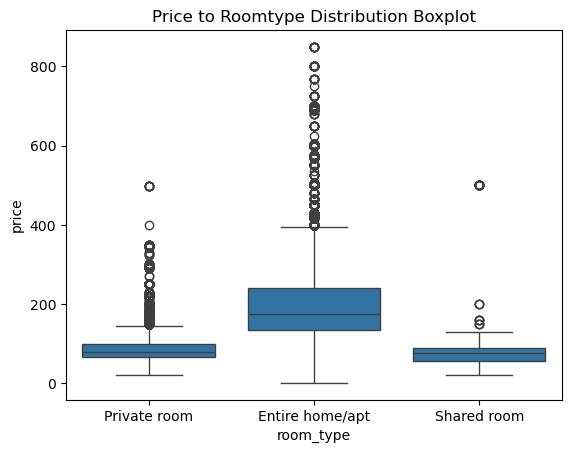

In [698]:
sns.boxplot(data=hz, y='price', x='room_type')
plt.title('Price to Roomtype Distribution Boxplot');               #seeing relationship between room_type and price   

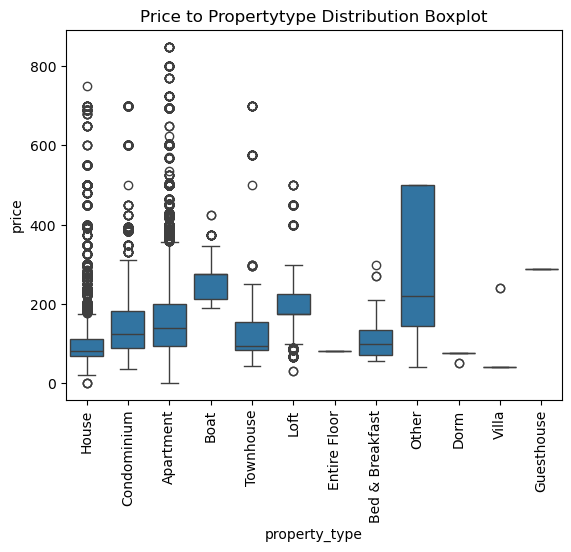

In [699]:
sns.boxplot(data=hz, y='price', x='property_type')                  #visualizing relationship between property_type and price   
plt.xticks(rotation=90)
plt.title('Price to Propertytype Distribution Boxplot');

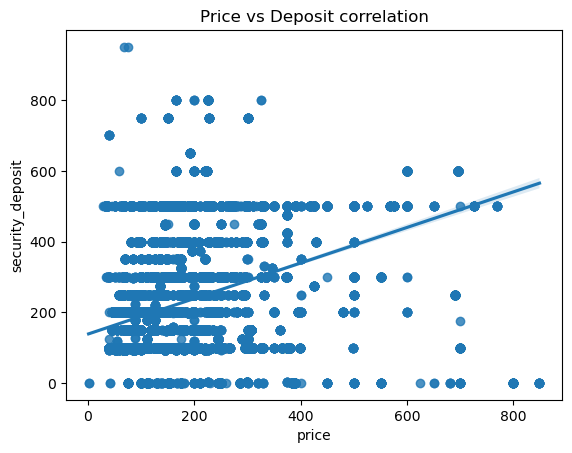

In [700]:
sns.regplot(data=hz, x='price', y='security_deposit')
plt.title('Price vs Deposit correlation');

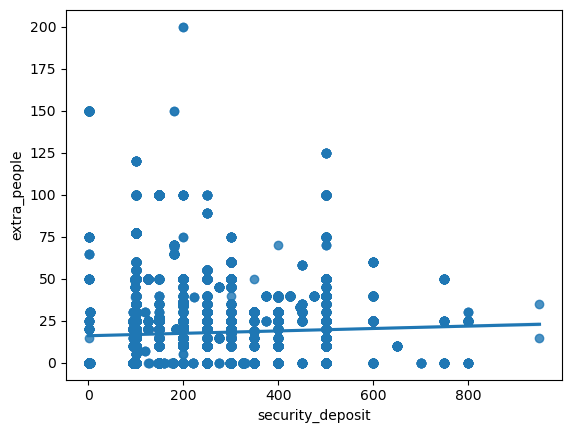

In [701]:
sns.regplot(data=hz, x='security_deposit', y='extra_people');         #exploring how host's deposit is affected by extra guests

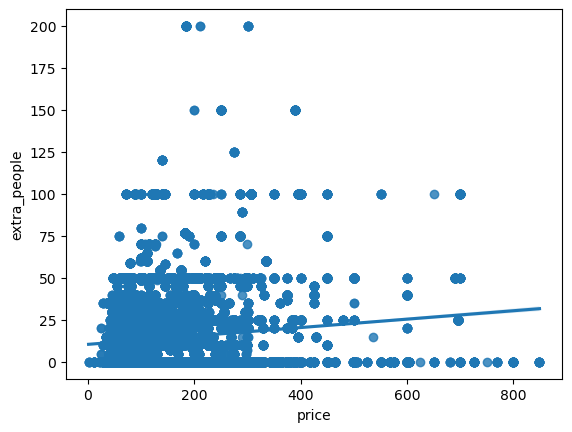

In [702]:
sns.regplot(data=hz, x='price', y='extra_people');            #exploring how price is affected by extra guests

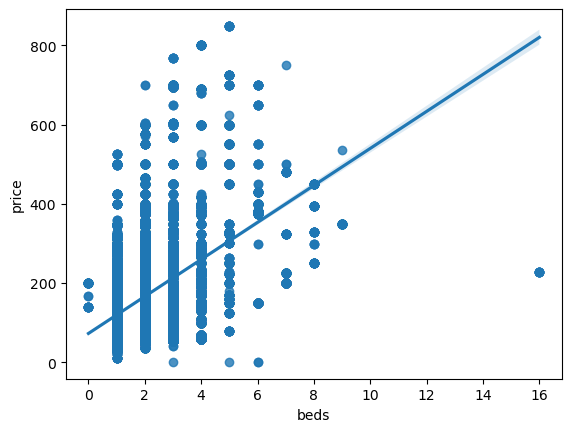

In [703]:
sns.regplot(data=hz, x='beds', y='price');         #visualizing how price is affected by no_of beds

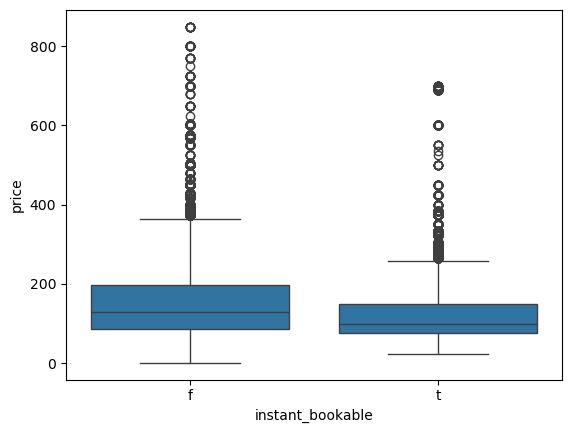

In [704]:
sns.boxplot(data=hz, y='price', x='instant_bookable');

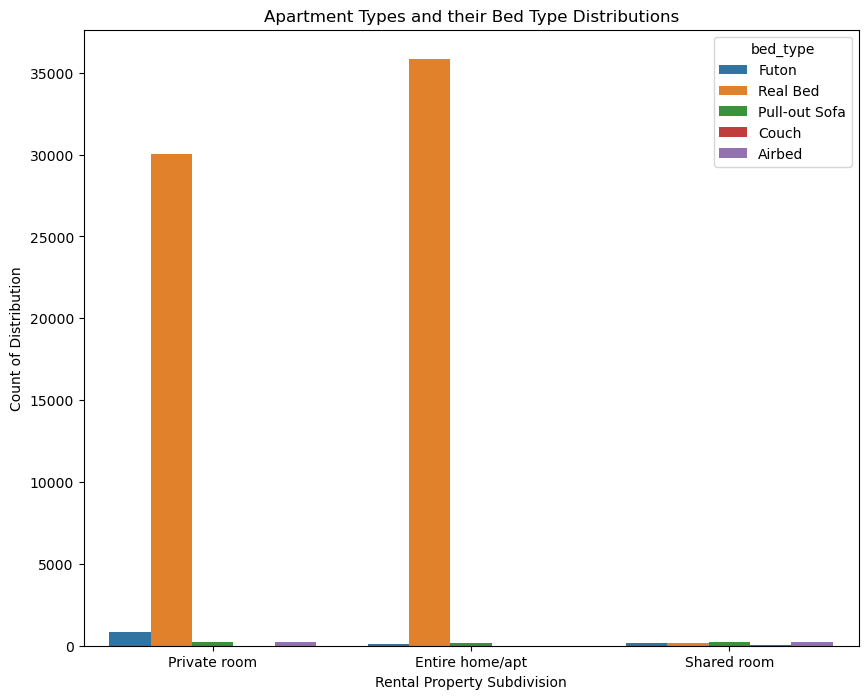

In [705]:
plt.figure(figsize=(10,8))
sns.countplot(data=hz, x='room_type', hue='bed_type')
plt.xlabel('Rental Property Subdivision')
plt.ylabel('Count of Distribution')
plt.title('Apartment Types and their Bed Type Distributions');          #very curiously I examine the distribution of bed types in different lsitings

#### Bivariate Insights:

* Not surprisingly, apartments have the largest prices
* This means that, generally, as the security_deposit increases, the price also tends to increase
* Although there is, it is a very weak positive relationship between security_deposit and extra_people.
* Number of beds determines price greatly
* Highest prices aren’t instantly bookable
* Entire apartments, just like every other kind prefer real bed

## 4. Multivariate EDA

Studying how the variables relate with one another and how they can help in predicting the target variable. How do the variables affect each other(Correlation) and affects the target variable.

Price vs Roomtype and ExtraPeople

Price vs Beds and InstantBookable

Plotting a correlelogram

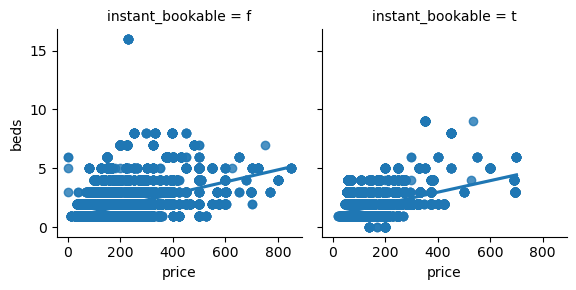

In [712]:
#Facetting

g = sns.FacetGrid(data=hz, col='instant_bookable')
g.map(sns.regplot, 'price', 'beds')

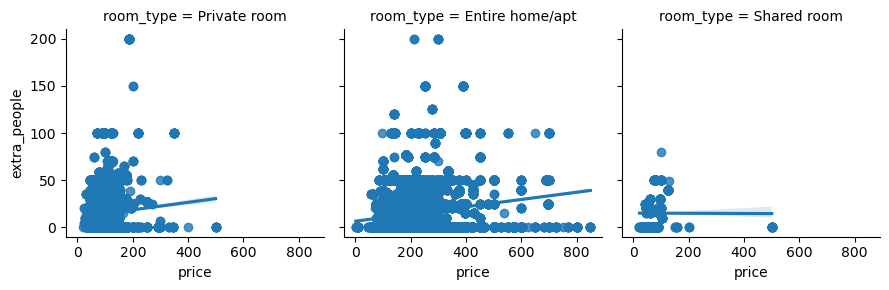

In [713]:
g = sns.FacetGrid(data=hz, col='room_type')
g.map(sns.regplot, 'price', 'extra_people')

In [714]:
le = LabelEncoder()

In [715]:
hist2ddf = hz.copy()     #copying for a correlelogram

In [716]:
for col in hist2ddf.select_dtypes(include='object'):    
    hist2ddf[col] = le.fit_transform(hist2ddf[col].astype(str))
        

In [717]:
hist2ddf.select_dtypes(include='object').columns

Index([], dtype='object')

In [718]:
hist2ddf.corr()

,availability_30,cancellation_policy,instant_bookable,minimum_nights,maximum_nights,bathrooms,bed_type,bedrooms,beds,cleaning_fee,...,host_is_superhost,host_listings_count,host_response_time,host_total_listings_count,number_of_reviews,review_scores_accuracy,price,security_deposit,extra_people,host_duration
availability_30,1.000000,0.091214,0.005555,0.003838,-0.027279,0.071924,-0.066092,0.123160,0.110656,0.122726,...,-0.068517,0.211696,0.067113,0.211696,-0.118965,-0.093380,0.123922,0.066869,0.148934,0.072809
cancellation_policy,0.091214,1.000000,0.013951,0.015345,0.046048,0.046500,0.012469,0.137997,0.124051,0.236344,...,-0.066133,-0.139227,0.094567,-0.139227,-0.041595,-0.014464,0.179875,0.150802,0.142982,0.022617
instant_bookable,0.005555,0.013951,1.000000,-0.084281,0.077601,0.049336,0.026941,-0.033874,0.040765,-0.053094,...,0.016107,-0.010203,0.372098,-0.010203,0.347166,-0.120049,-0.115770,-0.059665,-0.040258,0.106735
minimum_nights,0.003838,0.015345,-0.084281,1.000000,-0.012897,-0.006474,0.016330,0.000786,-0.029169,0.150709,...,0.038689,0.034127,-0.056160,0.034127,-0.085379,0.016862,0.014151,0.107407,-0.019921,-0.006683
maximum_nights,-0.027279,0.046048,0.077601,-0.012897,1.000000,-0.021894,0.008314,-0.013596,-0.030250,-0.012941,...,-0.030320,-0.000728,0.034288,-0.000728,0.056188,-0.036306,-0.011632,0.081927,-0.037619,0.028315
bathrooms,0.071924,0.046500,0.049336,-0.006474,-0.021894,1.000000,0.062163,0.354953,0.317810,0.171428,...,0.056353,0.085909,0.066029,0.085909,-0.022103,0.007873,0.220778,0.072246,0.056045,-0.018948
bed_type,-0.066092,0.012469,0.026941,0.016330,0.008314,0.062163,1.000000,0.056108,0.065764,0.118330,...,0.012308,0.027800,-0.011947,0.027800,0.045401,0.032655,0.106256,0.104992,0.018783,0.035435
bedrooms,0.123160,0.137997,-0.033874,0.000786,-0.013596,0.354953,0.056108,1.000000,0.705876,0.499173,...,0.016584,0.100485,0.016036,0.100485,-0.166229,0.110703,0.565961,0.340480,0.153906,-0.032280
beds,0.110656,0.124051,0.040765,-0.029169,-0.030250,0.317810,0.065764,0.705876,1.000000,0.474111,...,-0.052078,0.059385,0.039404,0.059385,-0.108352,0.009916,0.480744,0.289351,0.185153,-0.017792
cleaning_fee,0.122726,0.236344,-0.053094,0.150709,-0.012941,0.171428,0.118330,0.499173,0.474111,1.000000,...,0.013066,0.230490,-0.041912,0.230490,-0.231631,0.056735,0.647901,0.491459,0.059451,0.081657


In [719]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

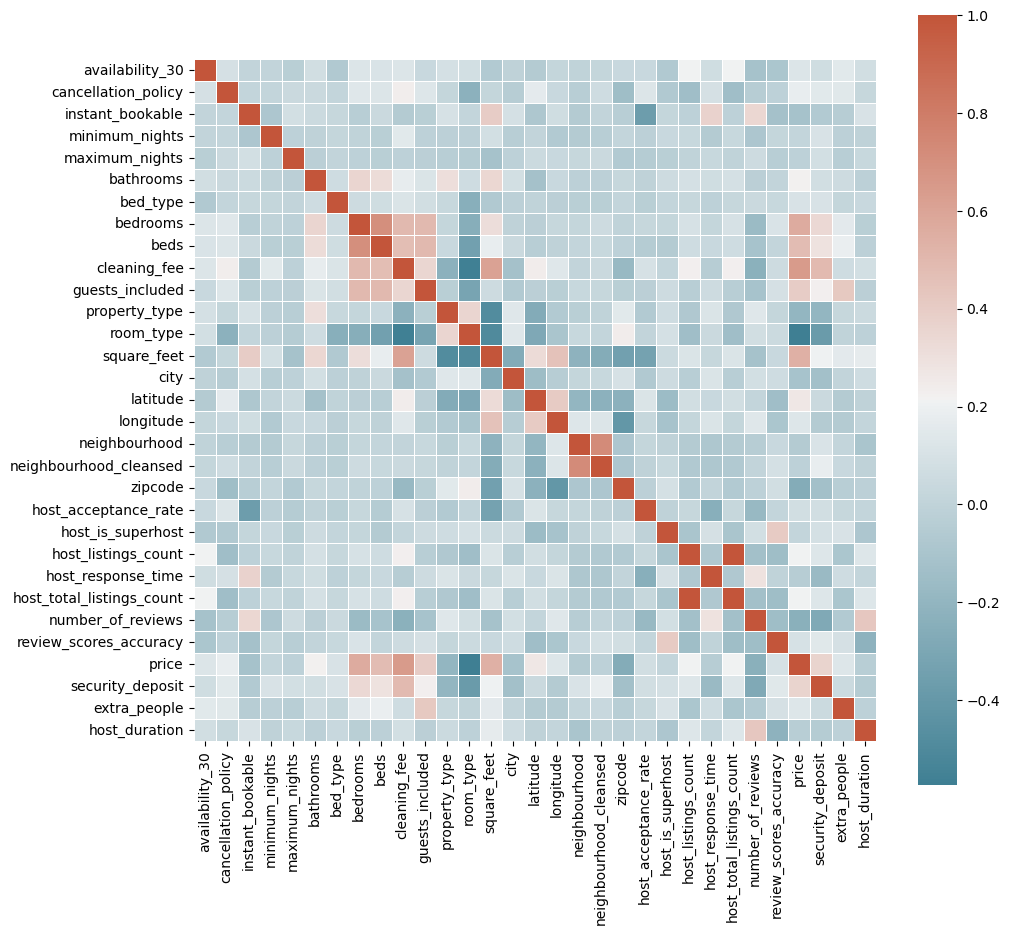

In [720]:
fig, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(hist2ddf.corr(), cmap=cmap, linewidths=.5, fmt='.2f', square=True);

#### Multivariate Insights:

* Instantly bookable listings, have about 700$ as their max price, with 10 max rooms really while non instantly bookable rooms have a wider range of bed numbers, and prices.
* For private rooms, there is a slight positive correlation between price and the number of extra people.
* For entire homes/apartments, the correlation is less clear, with a wider spread of data points.
* For shared rooms, there is minimal variation in the number of extra people regardless of price, with most data points clustered at lower prices.

#### Core Boston Exploration

In [723]:
hz.groupby(by='city').count()

,availability_30,cancellation_policy,instant_bookable,minimum_nights,maximum_nights,bathrooms,bed_type,bedrooms,beds,cleaning_fee,...,host_is_superhost,host_listings_count,host_response_time,host_total_listings_count,number_of_reviews,review_scores_accuracy,price,security_deposit,extra_people,host_duration
city,,,,,,,,,,,,,,,,,,,,,
ALLSTON,33,33,33,33,33,33,33,33,33,31,...,33,33,31,33,33,33,33,31,33,33
Allston,413,413,413,413,413,413,413,413,413,157,...,413,413,409,413,413,413,413,154,413,413
Boston,62350,62350,62350,62350,62350,61696,62350,62163,62237,42005,...,62350,62350,61291,62350,62350,62276,62350,27691,62350,62350
Boston,15,15,15,15,15,15,15,15,15,0,...,15,15,15,15,15,15,15,15,15,15
Boston (Charlestown),1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,0,1,1
Boston (Jamaica Plain),63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,0,63,63
Brighton,773,773,773,773,773,773,773,773,773,380,...,773,773,773,773,773,773,773,263,773,773
Brighton,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,0,2,2
Brookline,119,119,119,119,119,119,119,119,119,113,...,119,119,115,119,119,118,119,91,119,119


In [724]:
boston_df = hz[hz['city'].str.contains('Boston', case=False, na=False)]

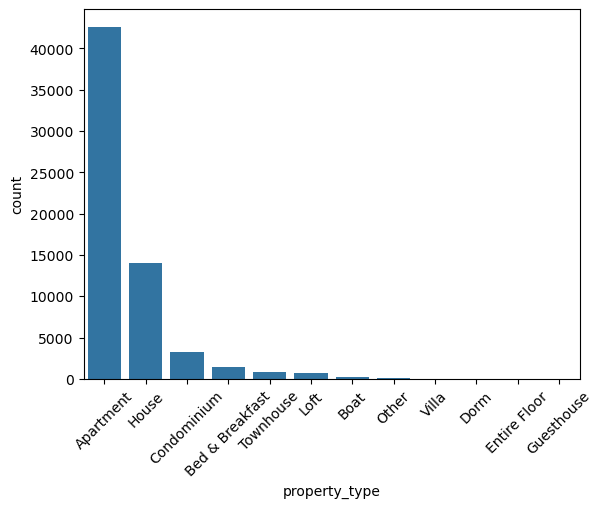

In [725]:
sns.countplot(data=boston_df, x='property_type', order=plot_order('property_type'))
plt.xticks(rotation=45);

#### We see how much of Boston's listings are made up of purely 'Apartments', in percentage

In [727]:
len(boston_df[boston_df['property_type']=='Apartment']) / boston_df['property_type'].shape[0] * 100

67.48883186008935

# SECTION V: DATA PREPROCESSING

In [729]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no price
    2. Create X as all the columns that are not the price column
    3. Create y as the price column
    4. For each numeric variable in X, fill the column with the mean value of the column.
    5. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    # Drop rows with missing price values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(hz)    

In [730]:
X.head()        

,availability_30,minimum_nights,maximum_nights,bathrooms,bedrooms,beds,cleaning_fee,guests_included,square_feet,latitude,...,host_acceptance_rate_95.0,host_acceptance_rate_96.0,host_acceptance_rate_97.0,host_acceptance_rate_98.0,host_acceptance_rate_99.0,host_acceptance_rate_100.0,host_is_superhost_t,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,7,1,1125,1.0,1.0,1.0,53.917638,1,586.221537,42.377796,...,False,False,True,False,False,False,False,False,False,True
1,7,1,1125,1.0,1.0,1.0,53.917638,1,586.221537,42.377796,...,False,False,True,False,False,False,False,False,False,True
2,7,1,1125,1.0,1.0,1.0,53.917638,1,586.221537,42.377796,...,False,False,True,False,False,False,False,False,False,True
3,7,1,1125,1.0,1.0,1.0,53.917638,1,586.221537,42.377796,...,False,False,True,False,False,False,False,False,False,True
4,7,1,1125,1.0,1.0,1.0,53.917638,1,586.221537,42.377796,...,False,False,True,False,False,False,False,False,False,True


In [731]:
X.columns          #access dummied variables

Index(['availability_30', 'minimum_nights', 'maximum_nights', 'bathrooms',
       'bedrooms', 'beds', 'cleaning_fee', 'guests_included', 'square_feet',
       'latitude',
       ...
       'host_acceptance_rate_95.0', 'host_acceptance_rate_96.0',
       'host_acceptance_rate_97.0', 'host_acceptance_rate_98.0',
       'host_acceptance_rate_99.0', 'host_acceptance_rate_100.0',
       'host_is_superhost_t', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour'],
      dtype='object', length=235)

In [732]:
y        #accessing our target variable

0        95.0
1        95.0
2        95.0
3        95.0
4        95.0
         ... 
68270    75.0
68271    75.0
68272    75.0
68273    75.0
68274    75.0
Name: price, Length: 68275, dtype: float64

In [733]:
#splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

In [734]:
scaler = StandardScaler()        #scaling our features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [735]:
X_train.shape               #shape accessments        

(47792, 235)

In [736]:
X_test.shape

(20483, 235)

In [737]:
y_train.shape

(47792,)

# SECTION VI: MODEL BUILDING AND EVALUATION

### 1. Linear Regression

In [740]:
linearmodel = LinearRegression()    #instantiating the linearmodel

In [741]:
linearmodel.fit(X_train, y_train)      #training model

LinearRegression()

In [742]:
y_test_preds = linearmodel.predict(X_test)

In [743]:
len(y_test_preds)

20483

In [744]:
r2score = r2_score(y_test, y_test_preds)
print(f"LinearRegression R² Score: {r2score}")
rmse = mean_squared_error(y_test, y_test_preds)
print(f"LinearRegression Root Mean Squared Error Score: {rmse}")
mae = mean_absolute_error(y_test, y_test_preds)
print(f"LinearRegression MeanAbsoluteError Score: {mae}")

LinearRegression R² Score: 0.9999958420902032
LinearRegression Root Mean Squared Error Score: 0.03731367545777522
LinearRegression MeanAbsoluteError Score: 0.001956833217945627


#### Our overly high R2 score here can be a sign of overfitting. 
To further validate, we go ahead to build 2 other comparative models as well as predict using our training data in any one of them

### 2. Random Forest Regressor

In [747]:
rfr = RandomForestRegressor(random_state=42)       #instantiating random forest

In [748]:
rfr.fit(X_train, y_train)         #training model

RandomForestRegressor(random_state=42)

In [749]:
y_pred = rfr.predict(X_test)        #predicting using model

In [750]:
r2score = r2_score(y_test, y_pred)         #scoring our model
print(f"RF R² Score: {r2score}")
rmse = mean_squared_error(y_test, y_pred)
print(f"RF Root Mean Squared Error Score: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"RF MeanAbsoluteError Score: {mae}")

RF R² Score: 0.9999997264931931
RF Root Mean Squared Error Score: 0.002454489088512445
RF MeanAbsoluteError Score: 0.0017599960943221046


#### Predicitng using our training data

In [752]:
y_train_pred = rfr.predict(X_train)            #predicting using training data

In [753]:
r2_train = r2_score(y_train, y_train_pred)               #scoring the trained data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Training R²: {r2_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training MAE: {mae_train}")

Training R²: 0.999997307936234
Training RMSE: 0.15696072539664324
Training MAE: 0.0021951372614663453


### 3. XGBoost Regressor

In [755]:
xgb_model = XGBRegressor(random_state=21, n_estimators=500)      #instantiating xgboost

In [756]:
xgb_model.fit(X_train, y_train)               #training model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=21, ...)

In [757]:
y_xgb_test = xgb_model.predict(X_test)

In [758]:
r2score = r2_score(y_test, y_xgb_test)
print(f"XGB R² Score: {r2score}")
rmse = mean_squared_error(y_test, y_xgb_test)
print(f"XGB Root Mean Squared Error Score: {rmse}")
mae = mean_absolute_error(y_test, y_xgb_test)
print(f"XGB MeanAbsoluteError Score: {mae}")

XGB R² Score: 0.9999973357366804
XGB Root Mean Squared Error Score: 0.023909478969220726
XGB MeanAbsoluteError Score: 0.010826843683359849


# SECTION VII: PROJECT OBJECTIVE

### Reserach Questions:

1. What is the general outlook of the reviews comments ?
2. As a prospective Airbnb host, what sort of apartment do I need to have to increase my chances of making profit off rentals
3. What factors 

### 1. What is the general outlook of the reviews comments ?

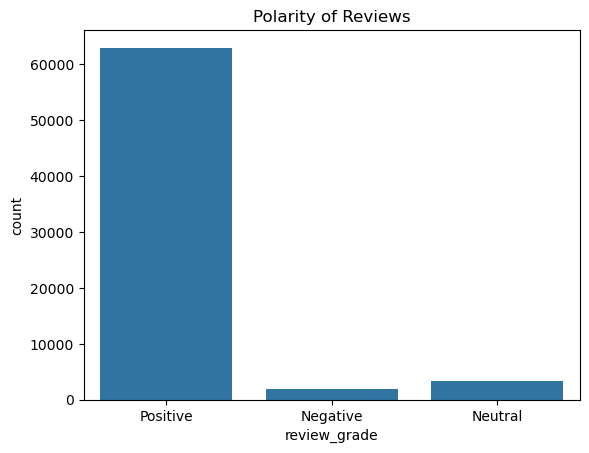

In [762]:
sns.countplot(data=reviews, x='review_grade')
plt.title('Polarity of Reviews');

##### Here, comments are a bit Positive rather than any other grade really. 

This shows a distinctly high satisfaction amongst reviewers outlooks of listings

### 2. As a prospective Airbnb host, what sort of apartment do I need to have to increase my chances of making profit off rentals

From wrangling, a couple insights have been gotten from these;

* People prefer rentals giving out the entire apartments
* Adding to this, 1 bedroom apartments would be preferred, maybe because it correlates with the price, or probably because its has the  1 room to 1 guest ratio
* In everyhome, real beds are most, more than any other to be fair.

### 3. What factors affect price the most ? 

Visualising our correlelogram, assuming our encoding is all accurate, 

* Beds
* Cleaning fee
* Bedroom 

affect our price variable the most

In [768]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

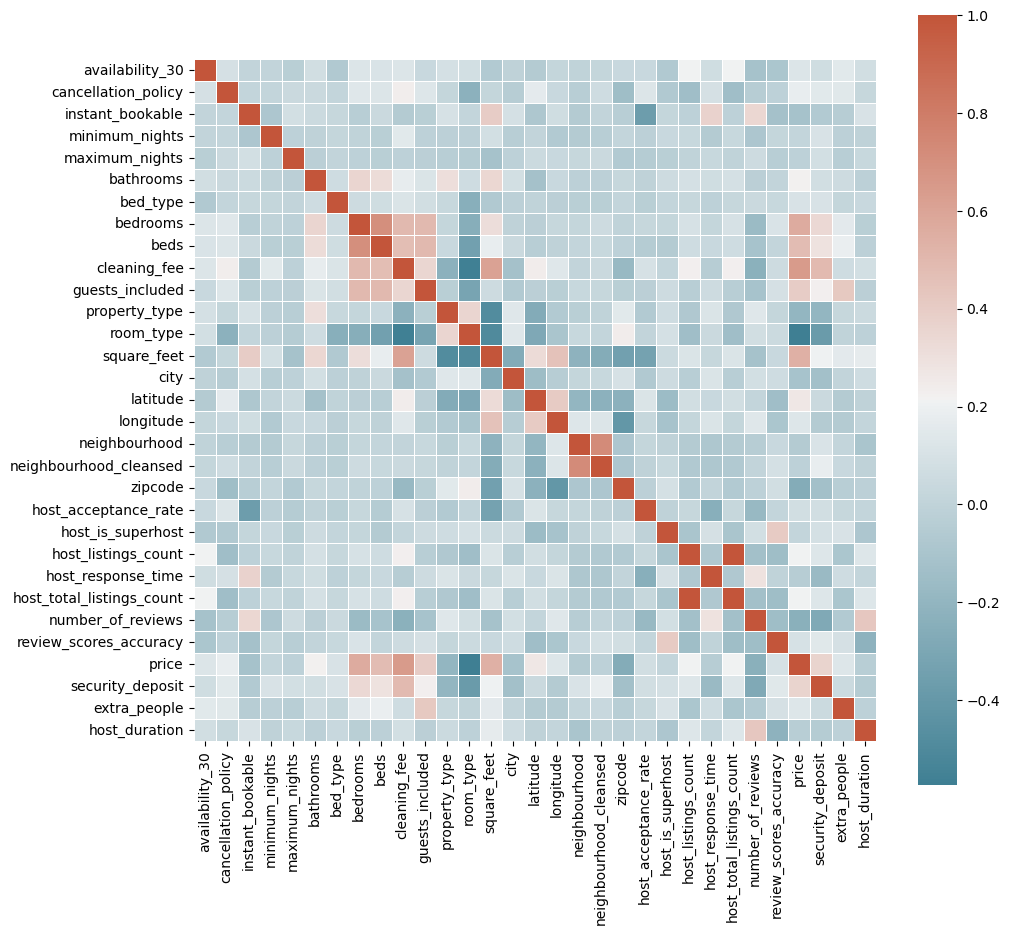

In [769]:
fig, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(hist2ddf.corr(), cmap=cmap, linewidths=.5, fmt='.2f', square=True);